## Ridge Regression

Least Square is an unbaised model. Due to the noise from data collecting, there may be unbalanace in the datasets. To stable the result, we need to shrink parameters because it is impossible that some parameters are far bigger than the others. Thus, ridge regression comes.

<img src="https://latex.codecogs.com/gif.latex?\begin{align*}&space;L&space;&=&space;\sum_{i}^N(y_i&space;-&space;\hat&space;y_i)^2&space;&plus;&space;\lambda&space;\sum_{j=1}^{p}&space;\beta_j^2&space;\\&space;&=&space;\frac{1}{2N}&space;\sum_{i=1}^{N}&space;(y_i&space;-&space;\sum_{j=1}^{p&plus;1}&space;{x_{ij}&space;\beta_j})^2&space;&plus;\lambda&space;||\beta||_2&space;\\&space;&=&space;\frac{1}{2N}&space;||Y&space;-&space;X\beta||^2&space;&plus;&space;\lambda&space;||\beta||_2&space;\end{align*}" title="\begin{align*} L &= \sum_{i}^N(y_i - \hat y_i)^2 + \lambda \sum_{j=1}^{p} \beta_j^2 \\ &= \frac{1}{2N} \sum_{i=1}^{N} (y_i - \sum_{j=1}^{p+1} {x_{ij} \beta_j})^2 +\lambda ||\beta||_2 \\ &= \frac{1}{2N} ||Y - X\beta||^2 + \lambda ||\beta||_2 \end{align*}" />

## Data Generator

We use the boston house price dataset. In preprocessing, to eliminate intercepet, we expand $X$'s dim and scale each feature's mean to zero and each feature's std to unit.

In [1]:
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
%matplotlib inline

In [2]:
x, y = load_boston(return_X_y=True)
m = x.shape[0]
inter = np.ones([m, 1]) # intercept
x = np.hstack((x, inter))
x.shape, y.shape

((506, 14), (506,))

In [3]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2018)
y_train, y_test = np.expand_dims(y_train, 1), np.expand_dims(y_test, 1)
X_train.shape, y_train.shape

((379, 14), (379, 1))

In [4]:
# Stand Normalization
x_scale = preprocessing.StandardScaler()
x_scale.fit(X_train)
X_train_, X_test_ = x_scale.transform(X_train), x_scale.transform(X_test)

y_scale = preprocessing.StandardScaler()
y_scale.fit(y_train)
y_train_, y_test_ = y_scale.transform(y_train), y_scale.transform(y_test)

## Closed-formed Solution

Again, like we did in the Least Square part, we know that the gradients of optimal solutions are zero.

<img src="https://latex.codecogs.com/gif.latex?\begin{align*}&space;\min_{\beta}&space;L&space;\Leftrightarrow&space;\frac{\partial&space;L}{\partial&space;\beta}&space;&=&space;2X^T(X\beta&space;-&space;Y)&space;-&space;\lambda&space;\beta&space;=&space;0&space;\\&space;\beta^*&space;&=&space;(X^TX&space;&plus;&space;\lambda&space;I)^{-1}X^TY&space;\end{align}" title="\begin{align*} \min_{\beta} L \Leftrightarrow \frac{\partial L}{\partial \beta} &= 2X^T(X\beta - Y) - \lambda \beta = 0 \\ \beta^* &= (X^TX + \lambda I)^{-1}X^TY \end{align}" />

In [5]:
lam = 1.0
beta = np.dot(np.dot(np.linalg.pinv(np.dot(X_train_.T, X_train_)+lam*np.eye(X_train_.shape[1])), X_train_.T), y_train_)
beta

array([[-0.07107727],
       [ 0.11680208],
       [ 0.00154869],
       [ 0.08847526],
       [-0.23555023],
       [ 0.26133222],
       [ 0.02688291],
       [-0.34854853],
       [ 0.26344574],
       [-0.21633525],
       [-0.20851589],
       [ 0.08318475],
       [-0.44919702],
       [ 0.        ]])

### Compare $\beta$ with one that we acquired from Least Square Solution

In [6]:
beta_ls = np.array([[-0.07209774],[ 0.11894099],[ 0.00445335],[ 0.08812723],[-0.23935669],[ 0.25977597],[ 0.02815424],[-0.35244908],
       [ 0.27334555],[-0.22559975],[-0.20973585],[ 0.08301262],[-0.45162878],[ 0.        ]])
np.hstack((beta_ls, beta))

array([[-0.07209774, -0.07107727],
       [ 0.11894099,  0.11680208],
       [ 0.00445335,  0.00154869],
       [ 0.08812723,  0.08847526],
       [-0.23935669, -0.23555023],
       [ 0.25977597,  0.26133222],
       [ 0.02815424,  0.02688291],
       [-0.35244908, -0.34854853],
       [ 0.27334555,  0.26344574],
       [-0.22559975, -0.21633525],
       [-0.20973585, -0.20851589],
       [ 0.08301262,  0.08318475],
       [-0.45162878, -0.44919702],
       [ 0.        ,  0.        ]])

('Ridge Regression Train Error', 11.828691847810763)

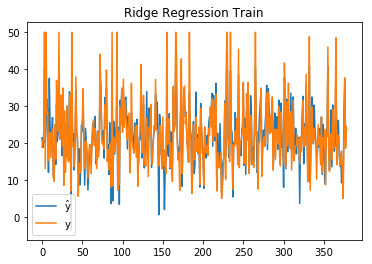

In [7]:
y_hat_train_ = np.dot(X_train_, beta)
y_hat_train = y_scale.inverse_transform(y_hat_train_)
plt.plot(y_hat_train, label="$\mathrm{\hat y}$")
plt.plot(y_train, label="$\mathrm{y}$")
plt.title("Ridge Regression Train")
plt.legend()
train_error = np.sum(np.square(y_hat_train - y_train))/(2*X_train.shape[0])
"Ridge Regression Train Error", train_error

('Ridge Regression Error', 8.577909409931296)

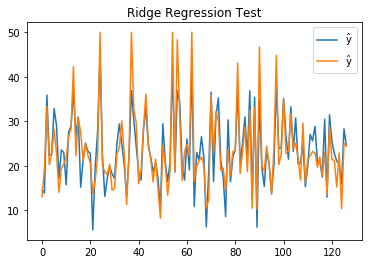

In [8]:
y_hat_test_ = np.dot(X_test_, beta)
y_hat_test = y_scale.inverse_transform(y_hat_test_)
plt.plot(y_hat_test, label="$\mathrm{\hat y}$")
plt.plot(y_test, label="$\mathrm{\hat y}$")
plt.title("Ridge Regression Test")
plt.legend()
test_error = np.sum(np.square(y_hat_test - y_test))/(2*y_test.shape[0])
"Ridge Regression Error", test_error

## Gradient Descent

By the same motivation, we will use iterative gradient descent to avoid over-fitting.
<img src="https://latex.codecogs.com/gif.latex?\begin{align*}&space;\beta^{(k&plus;1)}&space;&:=&space;\beta^{(k)}&space;-&space;\alpha&space;\frac{\partial&space;L}{\partial&space;\beta}&space;\\&space;&:=\beta^{(k)}&space;&plus;&space;\alpha&space;[X^T(X\beta-Y)&space;&plus;\lambda&space;\beta]&space;\end{align}" title="\begin{align*} \beta^{(k+1)} &:= \beta^{(k)} - \alpha \frac{\partial L}{\partial \beta} \\ &:=\beta^{(k)} + \alpha [X^T(X\beta-Y) +\lambda \beta] \end{align}" />

In [9]:
alpha = 3*1e-4
lam = 1.0
n_iter = 500
p = X_train_.shape[1]
beta = np.random.randn(p, 1)
errors = []

for i in range(n_iter):
    beta = beta - alpha*(np.dot(X_train_.T, np.dot(X_train_, beta)-y_train_) + lam * beta)
    y_hat_train_ = np.dot(X_train_, beta)
    y_hat_train = y_scale.inverse_transform(y_hat_train_)
    train_error = np.sum(np.square(y_hat_train - y_train))/(2*X_train.shape[0])
    errors.append(train_error)
beta

array([[-0.06979063],
       [ 0.11531815],
       [-0.00368772],
       [ 0.08914813],
       [-0.23497957],
       [ 0.26247367],
       [ 0.02579226],
       [-0.34957943],
       [ 0.24811379],
       [-0.19956877],
       [-0.20768415],
       [ 0.08315476],
       [-0.44867241],
       [ 0.03439212]])

Text(0,0.5,'train error')

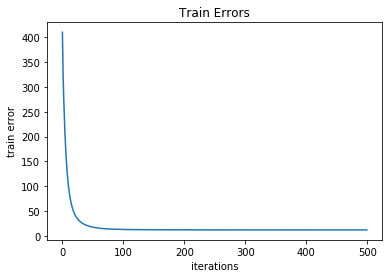

In [10]:
plt.plot(errors)
plt.title("Train Errors")
plt.xlabel("iterations")
plt.ylabel("train error")

('Gradient Descent Train Error', 11.831979092114414)

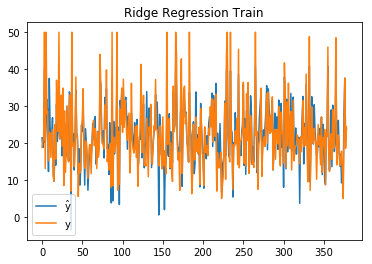

In [11]:
y_hat_train_ = np.dot(X_train_, beta)
y_hat_train = y_scale.inverse_transform(y_hat_train_)
plt.plot(y_hat_train, label="$\mathrm{\hat y}$")
plt.plot(y_train, label="$\mathrm{y}$")
plt.title("Ridge Regression Train")
plt.legend()
train_error = np.sum(np.square(y_hat_train - y_train))/(2*X_train.shape[0])
"Gradient Descent Train Error", train_error

('Gradient Descent Test Error', 8.588657588253644)

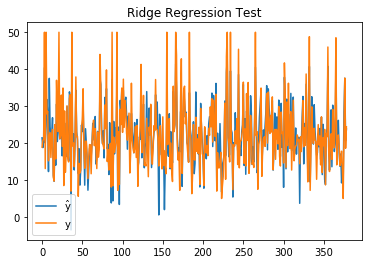

In [12]:
y_hat_test_ = np.dot(X_test_, beta)
y_hat_test = y_scale.inverse_transform(y_hat_test_)
plt.plot(y_hat_train, label="$\mathrm{\hat y}$")
plt.plot(y_train, label="$\mathrm{y}$")
plt.title("Ridge Regression Test")
plt.legend()
test_error = np.sum(np.square(y_hat_test - y_test))/(2*y_test.shape[0])
"Gradient Descent Test Error", test_error